# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [ ]:
# making an API call
import requests

api_endpoint = "https://pokeapi.co/api/v2/pokemon/"

poke_name = input('What Pokemon are you looking for? ')
response = requests.get(f"{api_endpoint}{poke_name}")

if response.status_code == 200:
    data = response.json()
    
    print(f"Success. 'data' for {poke_name} ready")
else:
    print(f"Error: Status Code {response.status_code}")

### Display a Pokemon's name, weight, abilities, and types

In [ ]:
# get the name
name = data['name']

In [ ]:
# get types
type = data['types'][0]

In [ ]:
# get weight
weight = data['weight']

In [ ]:
# get abilities
abilities = data['abilities']

In [ ]:
[ability_dict['ability']['name'] for ability_dict in abilities]

In [ ]:
# Create a structure for a single pokemon

In [ ]:
pokemon_dict = {
    'name': data['name'],
    'type': [type_dict for type_dict in data['types'][0]]
}

#### Create a function to Pull in your own Pokemon's data 

In [ ]:
def poke_api_call(poke_name):
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{poke_name}")
    if response.status_code == 200:
        data = response.json()
        print(f"Success. 'data' for {poke_name} ready")
        pokemon_dict = {key: data[key] for key in ['name', 'types', 'weight', 'abilities']}
        return pokemon_dict
    else:
        print(f"Error: Status Code {response.status_code}")
        
poke_api_call('jirachi')

Choose your pokemon

In [ ]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

print(random_team)

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [ ]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team:
    poke_dict = poke_api_call(i)
    my_six_pokemon[poke_dict['name']] = poke_dict

for k in my_six_pokemon:
    print(k, '\n' , my_six_pokemon[k])

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [ ]:
import requests

class Pokemon():
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if response.status_code == 200:
            data = response.json()
            self.abilities = [abil['ability']['name'] for abil in data['abilities']]
            self.types = [typ['type']['name'] for typ in data['types']]
            self.weight = data['weight']
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = data['sprites']['front_default']
        else:
            print(f"Error: Status Code {response.status_code}")

In [ ]:
new_poke = Pokemon('ho-oh', 'charmel')
new_poke.call_poke_api()
print(new_poke.abilities)

In [ ]:
new_poke.image

In [ ]:
from IPython.display import Image

display(Image(new_poke.image, width = 300))

### Let's Catch some Pokemon

In [ ]:
gians_pokemon = ['ceruledge', 'armarouge', 'typhlosion', 'decidueye', 'dragonite', 'quaquaval']

In [ ]:
pokedex = {pokemon: Pokemon(pokemon, "nickname") for pokemon in gians_pokemon}

In [ ]:
class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon, f"{self.username.title()}'s {pokemon.title()}")
        
new_pokedex = Pokedex("gian")
for pokemon_name in gians_pokemon:
    new_pokedex.add_pokemon(pokemon_name)
new_pokedex.username

print(new_pokedex.pokemon)

In [ ]:
def print_user_pokemon(pokedex):
    print(f"{pokedex.username}\'s Pokemon:")
    for poke in pokedex.pokemon:
        print(pokedex.pokemon[poke].name)
        
print_user_pokemon(new_pokedex)

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [5]:
from IPython.display import Image, clear_output
import requests

class Pokemon():
    def __init__(self, input_str):
        self.input_str = input_str
        self.poke_name = None
        self.poke_id = None
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.evolves_to = []
        self.evo_info = None
        self.all_moves = []
        self.learned_moves = []
        self.call_poke_api()
        
    def call_poke_api(self):
        info_res = self.api_call(f"https://pokeapi.co/api/v2/pokemon/{self.input_str}")
        if info_res[0] == 200:
            data = info_res[1]
            self.poke_id = data['id']
            self.poke_name = data['name']
            self.abilities = [abi['ability']['name'] for abi in data['abilities']]
            self.types = [typ['type']['name'] for typ in data['types']]
            self.weight = data['weight']
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            self.all_moves = list(set([move['move']['name'] for move in data['moves']]))
            self.learned_moves = self.fill_learned_moves()
            if not self.image:
                self.image = data['sprites']['front_default']
            species_res = self.api_call(data['species']['url'])
            if species_res[0] == 200:
                evolution_res = self.api_call(species_res[1]['evolution_chain']['url'])
                if evolution_res[0] == 200:
                    self.evo_info = evolution_res[1]
                    self.fill_evolutions()
                else:
                    print(f"Error Get Evolutionary Chain: Status Code {evolution_res[0]}")
                
            else:
                print(f"Error Get Species: Status Code {species_res[0]}")
        else:
            print(f"Error Get Info: Status Code {info_res[0]}")
            
    def print_pokemon(self):
        return display(Image(self.image, width = 200))
    
    def evolve(self):
        if self.evolves_to == None:
            print("This Pokemon does not evolve.")
        else:
            confirm_evo = input(f"Evolve {self.poke_name.title()} to {self.evolves_to.title()}? (y/n) ").lower()
            if confirm_evo == 'y' or confirm_evo == 'yes':
                pass
            elif confirm_evo == 'n' or confirm_evo == 'no':
                print("Evolution cancelled.")
            else:
                print("Not a valid response. Evolution cancelled.")
            
# Recursive Evolutionary Method
#     def get_evolution_chain(self):
#         response = get(self.species_url)
#         if response.status_code == 200:
#             data = response.json()
#         evolution_chain_url = data['evolution_chain']['url']
#         evolution_chain = get(evolution_chain_url)
#         if evolution_chain.status_code == 200:
#             return evolution_chain.json()['chain']
            
    def evolve_pokemon(self, evolution_chain):
        if not evolution_chain['evolves_to']:
            print(f'This is the final from')
            return
        current_pokemon_in_chain = evolution_chain['species']['name']
        next_pokemon_in_chain = evolution_chain['evolves_to'][0]['species']['name']
        if current_pokemon_in_chain == self.name:
            self.name = next_pokemon_in_chain
            self.call_poke_api()
            return
        else:
            return self.evolve_pokemon(evolution_chain['evolves_to'][0])
            
    def fill_evolutions(self):
        self.evolves_to = []
        if self.evo_info['chain']['species']['name'] == self.poke_name:
            for _name in self.evo_info['chain']['evolves_to']:
                self.evolves_to.append(_name['species']['name'])
        elif self.evo_info['chain']['evolves_to'][0]['species']['name'] == self.poke_name:
            for _name in self.evo_info['chain']['evolves_to'][0]['evolves_to']:
                self.evolves_to.append(_name['species']['name'])
        else:
            self.evolves_to = []
    
    def fill_learned_moves(self):
        moves_to_learn = []
        if len(self.all_moves) > 4:
            for idx in range(0, 4):
                moves_to_learn.append(self.all_moves[idx])
        else:
            for idx in range(0, len(self.all_moves)):
                moves_to_learn.append(self.all_moves[idx])
        return moves_to_learn

    def api_call(self, endpoint_url):
        res = requests.get(endpoint_url)
        if res.status_code == 200:
            return (200, res.json())
        else:
            return ({res.status_code}, {})

In [ ]:
char = Pokemon("charmander")
print(char.learned_moves)

In [ ]:
# Charmander

print(char.evo_info['chain']['species']['name'])
print(char.evo_info['chain']['evolves_to'][0]['species']['name'])

In [ ]:
# Charmeleon
print(char.evo_info['chain']['evolves_to'][0]['species']['name'])
print(char.evo_info['chain']['evolves_to'][0]['evolves_to'][0]['species']['name'])

In [ ]:
def find(pokemon_name):
    if char.evo_info['chain']['evolves_to'][0]['species']['name'] == pokemon_name:
        if char.evo_info['chain']['evolves_to'][0]['evolves_to'][0]['species']['name']:
            return char.evo_info['chain']['evolves_to'][0]['evolves_to'][0]['species']['name']
    if char.evo_info['chain']['species']['name'] == self.poke_name:
        for _name in self.evo_info['chain']['evolves_to']:
            _name['species']['name'])
    elif self.evo_info['chain']['evolves_to'][0]['species']['name'] == self.poke_name:
        for _name in self.evo_info['chain']['evolves_to'][0]['species']['name']:
            self.evolves_to.append(_name['species']['name'])

find('charmeleon')
evolves_to = []
for _name in char.evo_info['chain']['evolves_to']:
    evolves_to.append(_name['species']['name'])
print(evolves_to)

In [6]:
class Pokedex:
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    def roster(self):
        print(f"{self.username}\'s Pokemon: {', '.join(self.pokemon.keys()).title()}")
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon)
        
    def evolve(self, input_pokemon):
        if input_pokemon.lower() in self.pokemon:
            evolving_pokemon = input_pokemon.lower()
            evo_list = self.pokemon[evolving_pokemon].evolves_to
            if len(evo_list) == 0:
                print("{evolving_pokemon} does not evolve.")
            elif len(evo_list) == 1:
                next_pokemon = evo_list[0]
                self.pokemon[evolving_pokemon].print_pokemon()
                confirm_evo = input(f"Evolve {evolving_pokemon.title()} to {next_pokemon.title()}? (y/n) ").lower()
                if confirm_evo == 'y' or confirm_evo == 'yes':
                    self.pokemon.pop(evolving_pokemon)
                    self.pokemon[next_pokemon] = Pokemon(next_pokemon)
                    clear_output()
                    print(f"Congratulations! {evolving_pokemon.title()} has evolved into {next_pokemon.title()}!")
                    self.pokemon[next_pokemon].print_pokemon()
                elif confirm_evo == 'n' or confirm_evo == 'no':
                    print("Evolution cancelled.")
                else:
                    print("Not a valid response. Evolution cancelled.")
            elif len(evo_list) > 1:
                self.pokemon[evolving_pokemon].print_pokemon()
                next_pokemon = input(f"{evolving_pokemon.title()} can evolve to {str(', '.join(evo_list)).title()}. Which Pokemon to evolve to? ").lower()
                if next_pokemon in evo_list:
                    confirm_evo = input(f"Evolve {evolving_pokemon.title()} to {next_pokemon.title()}? (y/n) ").lower()
                    self.pokemon.pop(evolving_pokemon)
                    self.pokemon[next_pokemon] = Pokemon(next_pokemon)
                    clear_output()
                    print(f"Congratulations! {evolving_pokemon.title()} has evolved into {next_pokemon.title()}!")
                    self.pokemon[next_pokemon].print_pokemon()
                else:
                    print("Not a valid response. Evolution cancelled.")
        else:
            print(f"{input_pokemon} not found in {self.username.title()}'s pokedex.")


In [12]:
gians_pokelist = ['bulbasaur', 'oshawott', 'swinub', 'ralts', 'wooper', 'eevee']
gian_dex = Pokedex("Gian")
for _name in gians_pokelist:
    gian_dex.add_pokemon(_name)

gian_dex.roster()

Gian's Pokemon: Bulbasaur, Oshawott, Swinub, Ralts, Wooper, Eevee


In [ ]:
# Exercise 1: Display Images Homework
# print_pokemon method can be accessed on the Pokemon class

gian_dex.pokemon['oshawott'].print_pokemon()
gian_dex.pokemon['bulbasaur'].print_pokemon()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [13]:
# Display current roster
gian_dex.roster()

Gian's Pokemon: Bulbasaur, Oshawott, Swinub, Ralts, Wooper, Eevee


Congratulations! Kirlia has evolved into Gallade!


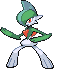

In [15]:
# Check if pokemon has evolved

gian_dex.evolve("kirlia")

Now let's evolve a few

In [ ]:
gian_dex.evolve("Wooper")

In [ ]:
gian_dex.evolve("Ivysaur")

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [ ]:
class Move_Tutor(Pokemon):
    
    def __init__(self, poke_name):
        super().__init__(poke_name, all_moves, learned_moves)
        self.poke_name = poke_name
        self.all_moves = all_moves
        self.learned_moves = learned_moves
        
    

In [ ]:
pikachu.teach_move()


In [ ]:
pikachu.show_moves()